In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

folder_test_neu = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\03_primary\\"
folder_test_alt = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\03_primary\\"

folder_model = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\06_models\\"

file_test_neu_SeiteA = "test_neu_SeiteA.csv"
file_test_alt = "test_alt.csv"

file_test_neu1000_SeiteA = "test_neu1000_SeiteA.csv"
file_test_alt1000 = "test_alt1000.csv"

file_test_neu2000 = "test_neu2000.csv"
file_test_alt2000 = "test_alt2000.csv"

In [2]:
# load the model from disk
model_knn_SeiteA = pickle.load(open(folder_model + "model_knn_SeiteA", 'rb'))
model_tree_SeiteA = pickle.load(open(folder_model + "model_tree_SeiteA", 'rb'))
model_svm_SeiteA = pickle.load(open(folder_model + "model_svm_SeiteA", 'rb'))
model_forest_SeiteA = pickle.load(open(folder_model + "model_forest_SeiteA", 'rb'))

model_knn1000_SeiteA = pickle.load(open(folder_model + "model_knn1000_SeiteA", 'rb'))
model_tree1000_SeiteA = pickle.load(open(folder_model + "model_tree1000_SeiteA", 'rb'))
model_svm1000_SeiteA = pickle.load(open(folder_model + "model_svm1000_SeiteA", 'rb'))
model_forest1000_SeiteA = pickle.load(open(folder_model + "model_forest1000_SeiteA", 'rb'))

model_knn2000 = pickle.load(open(folder_model + "model_knn2000", 'rb'))
model_tree2000 = pickle.load(open(folder_model + "model_tree2000", 'rb'))
model_svm2000 = pickle.load(open(folder_model + "model_svm2000", 'rb'))
model_forest2000 = pickle.load(open(folder_model + "model_forest2000", 'rb'))

In [3]:
def getdf(folder, file):
    data = pd.read_csv(str(folder + file), sep=',')
    return data

In [4]:
df_test_neu1000_SeiteA = getdf(folder_test_neu, file_test_neu1000_SeiteA)
df_test_alt1000 = getdf(folder_test_alt, file_test_alt1000)

df_test_neu2000 = getdf(folder_test_neu, file_test_neu2000)
df_test_alt2000 = getdf(folder_test_alt, file_test_alt2000)

df_test_neu_SeiteA = pd.concat([df_test_neu1000_SeiteA,df_test_neu2000])
df_test_alt = pd.concat([df_test_alt1000,df_test_alt2000])

In [5]:
# The columns '449.8245614035087','363.859649122807' can also be retained
columns_to_drop = ['243.50877192982455','449.8245614035087','467.0175438596491','484.2105263157894','501.40350877192975','518.5964912280701','535.7894736842105','552.9824561403508','673.3333333333333','914.0350877192982','724.9122807017543','20.0','37.19298245614035','54.3859649122807','71.57894736842104','88.7719298245614','105.96491228070175','123.1578947368421','140.35087719298244','157.5438596491228','174.73684210526315','191.9298245614035','209.12280701754383','226.3157894736842','570.1754385964912','587.3684210526316','604.5614035087718','621.7543859649122','638.9473684210526','656.1403508771929','690.5263157894736','707.719298245614','742.1052631578947','759.2982456140351','776.4912280701753','793.6842105263157','810.8771929824561','828.0701754385964','845.2631578947368','862.4561403508771','879.6491228070174','896.8421052631578','931.2280701754385','948.4210526315788','965.6140350877192','982.8070175438595','1000.0']
df_test_neu_SeiteA.drop(columns = columns_to_drop, inplace=True)
df_test_alt.drop(columns = columns_to_drop, inplace=True)
df_test_neu1000_SeiteA.drop(columns = columns_to_drop, inplace=True)
df_test_alt1000.drop(columns = columns_to_drop, inplace=True)
df_test_neu2000.drop(columns = columns_to_drop, inplace=True)
df_test_alt2000.drop(columns = columns_to_drop, inplace=True)

In [6]:
#df_test_neu = df_test_neu.diff(axis=1)
#df_test_alt = df_test_alt.diff(axis=1)
#df_test_neu1000 = df_test_neu1000.diff(axis=1)
#df_test_alt1000 = df_test_alt1000.diff(axis=1)
#df_test_neu2000 = df_test_neu2000.diff(axis=1)
#df_test_alt2000 = df_test_alt2000.diff(axis=1)
#df_test_alt2000

In [7]:
#columns_to_drop = ['20.0']
#df_test_neu.drop(columns = columns_to_drop, inplace=True)
#df_test_alt.drop(columns = columns_to_drop, inplace=True)
#df_test_neu1000.drop(columns = columns_to_drop, inplace=True)
#df_test_alt1000.drop(columns = columns_to_drop, inplace=True)
#df_test_neu2000.drop(columns = columns_to_drop, inplace=True)
#df_test_alt2000.drop(columns = columns_to_drop, inplace=True)
#df_test_alt2000

In [8]:
z_df_test_neu_SeiteA = df_test_neu_SeiteA
z_df_test_alt = df_test_alt
z_df_test_neu1000_SeiteA = df_test_neu1000_SeiteA
z_df_test_alt1000 = df_test_alt1000
z_df_test_neu2000 = df_test_neu2000
z_df_test_alt2000 = df_test_alt2000

In [9]:
z_df_test_neu_SeiteA['Label'] = 'neu'
z_df_test_alt['Label'] = 'alt'
frames_SeiteA = [z_df_test_neu_SeiteA, z_df_test_alt]
result_SeiteA = pd.concat(frames_SeiteA)
result_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
result_SeiteA = shuffle(result_SeiteA)

x_SeiteA = result_SeiteA.iloc[:, :-1].values
y_SeiteA = result_SeiteA.iloc[:, len(result_SeiteA.columns)-1].values

z_df_test_neu1000_SeiteA['Label'] = 'neu'
z_df_test_alt1000['Label'] = 'alt'
frames1000_SeiteA = [z_df_test_neu1000_SeiteA, z_df_test_alt1000]
result1000_SeiteA = pd.concat(frames1000_SeiteA)
result1000_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
result1000_SeiteA = shuffle(result1000_SeiteA)

x1000_SeiteA = result1000_SeiteA.iloc[:, :-1].values
y1000_SeiteA = result1000_SeiteA.iloc[:, len(result1000_SeiteA.columns)-1].values

z_df_test_neu2000['Label'] = 'neu'
z_df_test_alt2000['Label'] = 'alt'
frames2000 = [z_df_test_neu2000, z_df_test_alt2000]
result2000 = pd.concat(frames2000)
result2000.drop(columns=['Unnamed: 0'],inplace=True)
result2000 = shuffle(result2000)

x2000 = result2000.iloc[:, :-1].values
y2000 = result2000.iloc[:, len(result2000.columns)-1].values

In [10]:
result_SeiteA

,260.7017543859649,277.89473684210526,295.0877192982456,312.2807017543859,329.4736842105263,346.66666666666663,363.859649122807,381.05263157894734,398.24561403508767,415.43859649122805,432.6315789473684,Label
127,3351.241113,19780.060313,36720.407528,24048.270000,19099.640730,23504.962285,40884.409987,32475.030362,18701.265037,8260.515057,6664.112619,alt
11,5937.991916,23818.887233,40572.450259,21098.227508,22646.852165,32817.696598,34192.801070,9198.352298,8078.897450,14139.798584,16867.929571,alt
297,6901.339580,28438.211090,35008.097492,19987.260968,38619.142533,3738.035982,33583.076214,31000.630203,36169.841830,24472.181370,19628.047381,neu
489,7064.706717,28828.396157,34458.060958,20117.987598,38371.074522,6215.036685,28893.048160,31967.029530,33027.815701,24675.448243,19403.704595,neu
381,6964.745006,28843.418833,36163.929488,22018.956220,38438.242624,2521.714100,42474.637432,26240.353847,44373.070054,24903.676937,19899.855276,neu
...,...,...,...,...,...,...,...,...,...,...,...,...
111,10564.962518,34791.442468,31102.268020,31296.425818,23161.214152,33228.435834,1038.000000,18859.946660,21218.041616,11153.132340,27985.217401,neu
201,3331.039628,19491.177337,27737.164833,28664.181778,32975.721630,31089.314081,31394.001019,32300.163421,18626.413638,8124.419056,6412.552768,alt
74,5765.763176,24996.996980,12088.692568,15080.872256,20288.739783,19398.147669,39309.708432,22203.913642,10490.876227,10600.872417,18069.630572,alt
517,1609.436237,2877.883945,23909.242836,12634.541899,14458.244326,17697.855379,19078.166605,31945.927831,15627.303542,12195.778983,10809.942507,alt


In [11]:
scaler = StandardScaler()

scaler.fit(x_SeiteA)
x_SeiteA = scaler.transform(x_SeiteA)

scaler.fit(x1000_SeiteA)
x1000_SeiteA = scaler.transform(x1000_SeiteA)

scaler.fit(x2000)
x2000 = scaler.transform(x2000)

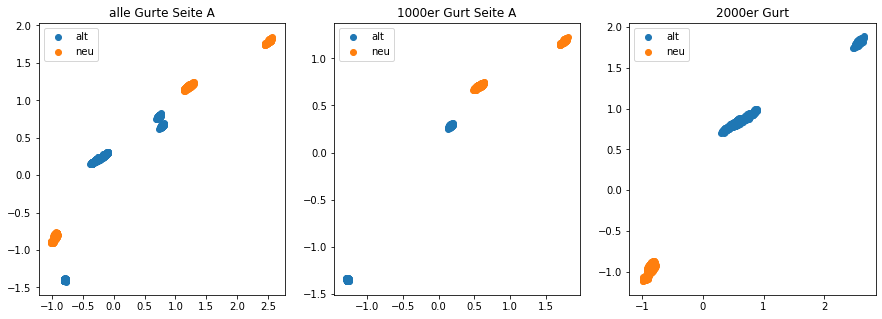

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]

plt.subplot(1, 3, 1)
X_set_SeiteA, y_set_SeiteA = x_SeiteA, y_SeiteA
for i,j in enumerate(np.unique(y_set_SeiteA)):
    plt.scatter(X_set_SeiteA[y_set_SeiteA==j,0],X_set_SeiteA[y_set_SeiteA==j,1],label = j) 
plt.title("alle Gurte Seite A")
plt.legend()

plt.subplot(1, 3, 2)
X_set1000_SeiteA, y_set1000_SeiteA = x1000_SeiteA, y1000_SeiteA
for i,j in enumerate(np.unique(y_set1000_SeiteA)):
    plt.scatter(X_set1000_SeiteA[y_set1000_SeiteA==j,0],X_set1000_SeiteA[y_set1000_SeiteA==j,1],label = j)
plt.title("1000er Gurt Seite A")
plt.legend()

plt.subplot(1, 3, 3)
X_set2000, y_set2000 = x2000, y2000
for i,j in enumerate(np.unique(y_set2000)):
    plt.scatter(X_set2000[y_set2000==j,0],X_set2000[y_set2000==j,1],label = j)
plt.title("2000er Gurt")
plt.legend()

plt.show()

In [13]:
y_pred_knn_SeiteA = model_knn_SeiteA.predict(x_SeiteA)
print(confusion_matrix(y_SeiteA, y_pred_knn_SeiteA))
print(classification_report(y_SeiteA, y_pred_knn_SeiteA))

y_pred_tree_SeiteA = model_tree_SeiteA.predict(x_SeiteA)
print(confusion_matrix(y_SeiteA, y_pred_tree_SeiteA))
print(classification_report(y_SeiteA, y_pred_tree_SeiteA))

y_pred_svm_SeiteA = model_svm_SeiteA.predict(x_SeiteA)
print(confusion_matrix(y_SeiteA, y_pred_svm_SeiteA))
print(classification_report(y_SeiteA, y_pred_svm_SeiteA))

y_pred_forest_SeiteA = model_forest_SeiteA.predict(x_SeiteA)
print(confusion_matrix(y_SeiteA, y_pred_forest_SeiteA))
print(classification_report(y_SeiteA, y_pred_forest_SeiteA))

[[1079  176]
 [  56 1396]]
              precision    recall  f1-score   support

         alt       0.95      0.86      0.90      1255
         neu       0.89      0.96      0.92      1452

    accuracy                           0.91      2707
   macro avg       0.92      0.91      0.91      2707
weighted avg       0.92      0.91      0.91      2707

[[1149  106]
 [   1 1451]]
              precision    recall  f1-score   support

         alt       1.00      0.92      0.96      1255
         neu       0.93      1.00      0.96      1452

    accuracy                           0.96      2707
   macro avg       0.97      0.96      0.96      2707
weighted avg       0.96      0.96      0.96      2707

[[1029  226]
 [  38 1414]]
              precision    recall  f1-score   support

         alt       0.96      0.82      0.89      1255
         neu       0.86      0.97      0.91      1452

    accuracy                           0.90      2707
   macro avg       0.91      0.90      0.90    

In [14]:
y_pred_knn1000_SeiteA = model_knn1000_SeiteA.predict(x1000_SeiteA)
print(confusion_matrix(y1000_SeiteA, y_pred_knn1000_SeiteA))
print(classification_report(y1000_SeiteA, y_pred_knn1000_SeiteA))

y_pred_tree1000_SeiteA = model_tree1000_SeiteA.predict(x1000_SeiteA)
print(confusion_matrix(y1000_SeiteA, y_pred_tree1000_SeiteA))
print(classification_report(y1000_SeiteA, y_pred_tree1000_SeiteA))

y_pred_svm1000_SeiteA = model_svm1000_SeiteA.predict(x1000_SeiteA)
print(confusion_matrix(y1000_SeiteA, y_pred_svm1000_SeiteA))
print(classification_report(y1000_SeiteA, y_pred_svm1000_SeiteA))

y_pred_forest1000_SeiteA = model_forest1000_SeiteA.predict(x1000_SeiteA)
print(confusion_matrix(y1000_SeiteA, y_pred_forest1000_SeiteA))
print(classification_report(y1000_SeiteA, y_pred_forest1000_SeiteA))

[[545   0]
 [116 606]]
              precision    recall  f1-score   support

         alt       0.82      1.00      0.90       545
         neu       1.00      0.84      0.91       722

    accuracy                           0.91      1267
   macro avg       0.91      0.92      0.91      1267
weighted avg       0.92      0.91      0.91      1267

[[545   0]
 [116 606]]
              precision    recall  f1-score   support

         alt       0.82      1.00      0.90       545
         neu       1.00      0.84      0.91       722

    accuracy                           0.91      1267
   macro avg       0.91      0.92      0.91      1267
weighted avg       0.92      0.91      0.91      1267

[[545   0]
 [  0 722]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       545
         neu       1.00      1.00      1.00       722

    accuracy                           1.00      1267
   macro avg       1.00      1.00      1.00      1267
weigh

In [15]:
y_pred_knn2000 = model_knn2000.predict(x2000)
print(confusion_matrix(y2000, y_pred_knn2000))
print(classification_report(y2000, y_pred_knn2000))

y_pred_tree2000 = model_tree2000.predict(x2000)
print(confusion_matrix(y2000, y_pred_tree2000))
print(classification_report(y2000, y_pred_tree2000))

y_pred_svm2000 = model_svm2000.predict(x2000)
print(confusion_matrix(y2000, y_pred_svm2000))
print(classification_report(y2000, y_pred_svm2000))

y_pred_forest2000 = model_forest2000.predict(x2000)
print(confusion_matrix(y2000, y_pred_forest2000))
print(classification_report(y2000, y_pred_forest2000))

[[561 149]
 [588 142]]
              precision    recall  f1-score   support

         alt       0.49      0.79      0.60       710
         neu       0.49      0.19      0.28       730

    accuracy                           0.49      1440
   macro avg       0.49      0.49      0.44      1440
weighted avg       0.49      0.49      0.44      1440

[[611  99]
 [  0 730]]
              precision    recall  f1-score   support

         alt       1.00      0.86      0.93       710
         neu       0.88      1.00      0.94       730

    accuracy                           0.93      1440
   macro avg       0.94      0.93      0.93      1440
weighted avg       0.94      0.93      0.93      1440

[[568 142]
 [235 495]]
              precision    recall  f1-score   support

         alt       0.71      0.80      0.75       710
         neu       0.78      0.68      0.72       730

    accuracy                           0.74      1440
   macro avg       0.74      0.74      0.74      1440
weigh